In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [16]:
data=pd.read_csv('Heart.csv')
data.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Heart Disease,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Absence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [17]:
data.dtypes

Name                                               object
Gender                                             object
Age                                                 int64
Chest pain                                          int64
Shortness of breath                                 int64
Fatigue                                             int64
Systolic                                            int64
Diastolic                                           int64
Heart rate (bpm)                                    int64
Lung sounds                                         int64
Cholesterol level (mg/dL)                           int64
LDL level (mg/dL)                                   int64
HDL level (mg/dL)                                   int64
Diabetes                                            int64
Atrial fibrillation                                 int64
Mitral valve prolapse                               int64
Rheumatic fever                                     int64
Mitral stenosi

In [18]:
dataNum = data.select_dtypes(include = np.int64)

<AxesSubplot:ylabel='Count'>

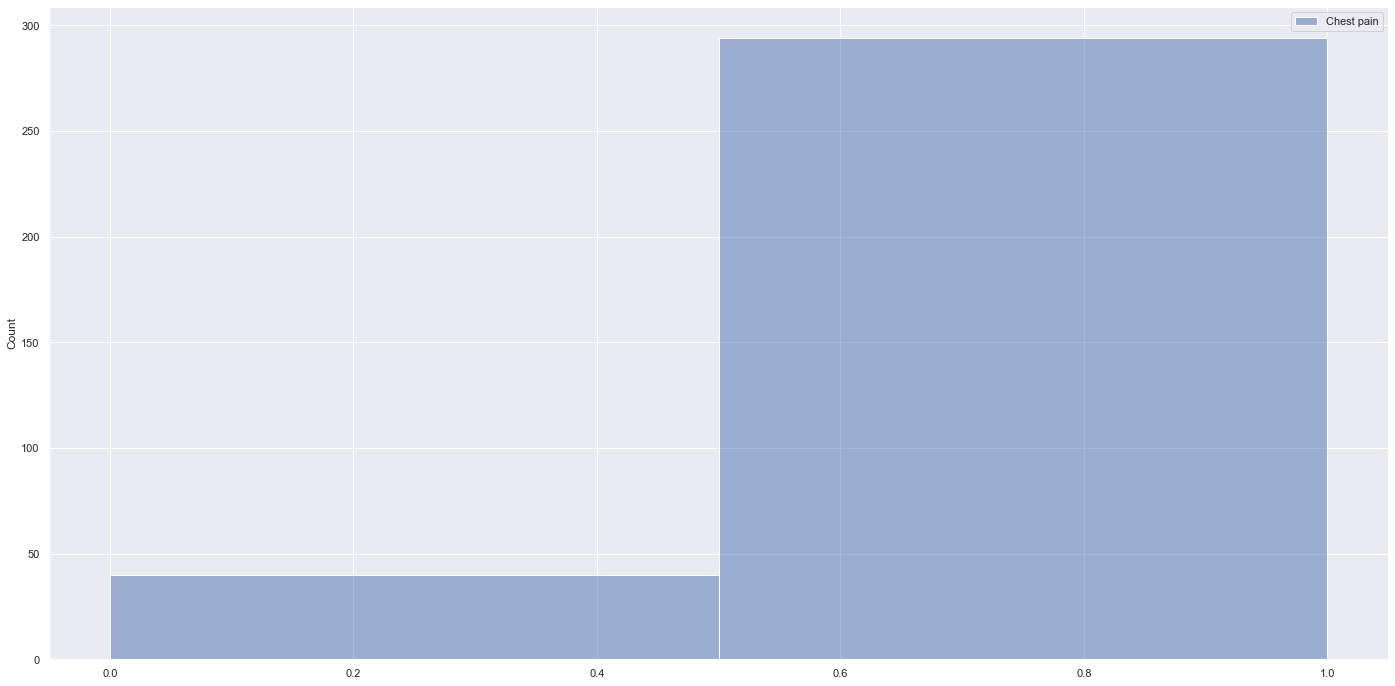

In [21]:
chestpain = pd.DataFrame(dataNum['Chest pain'])
f = plt.figure(figsize=(24, 12))
sb.histplot(data=chestpain, bins=2)

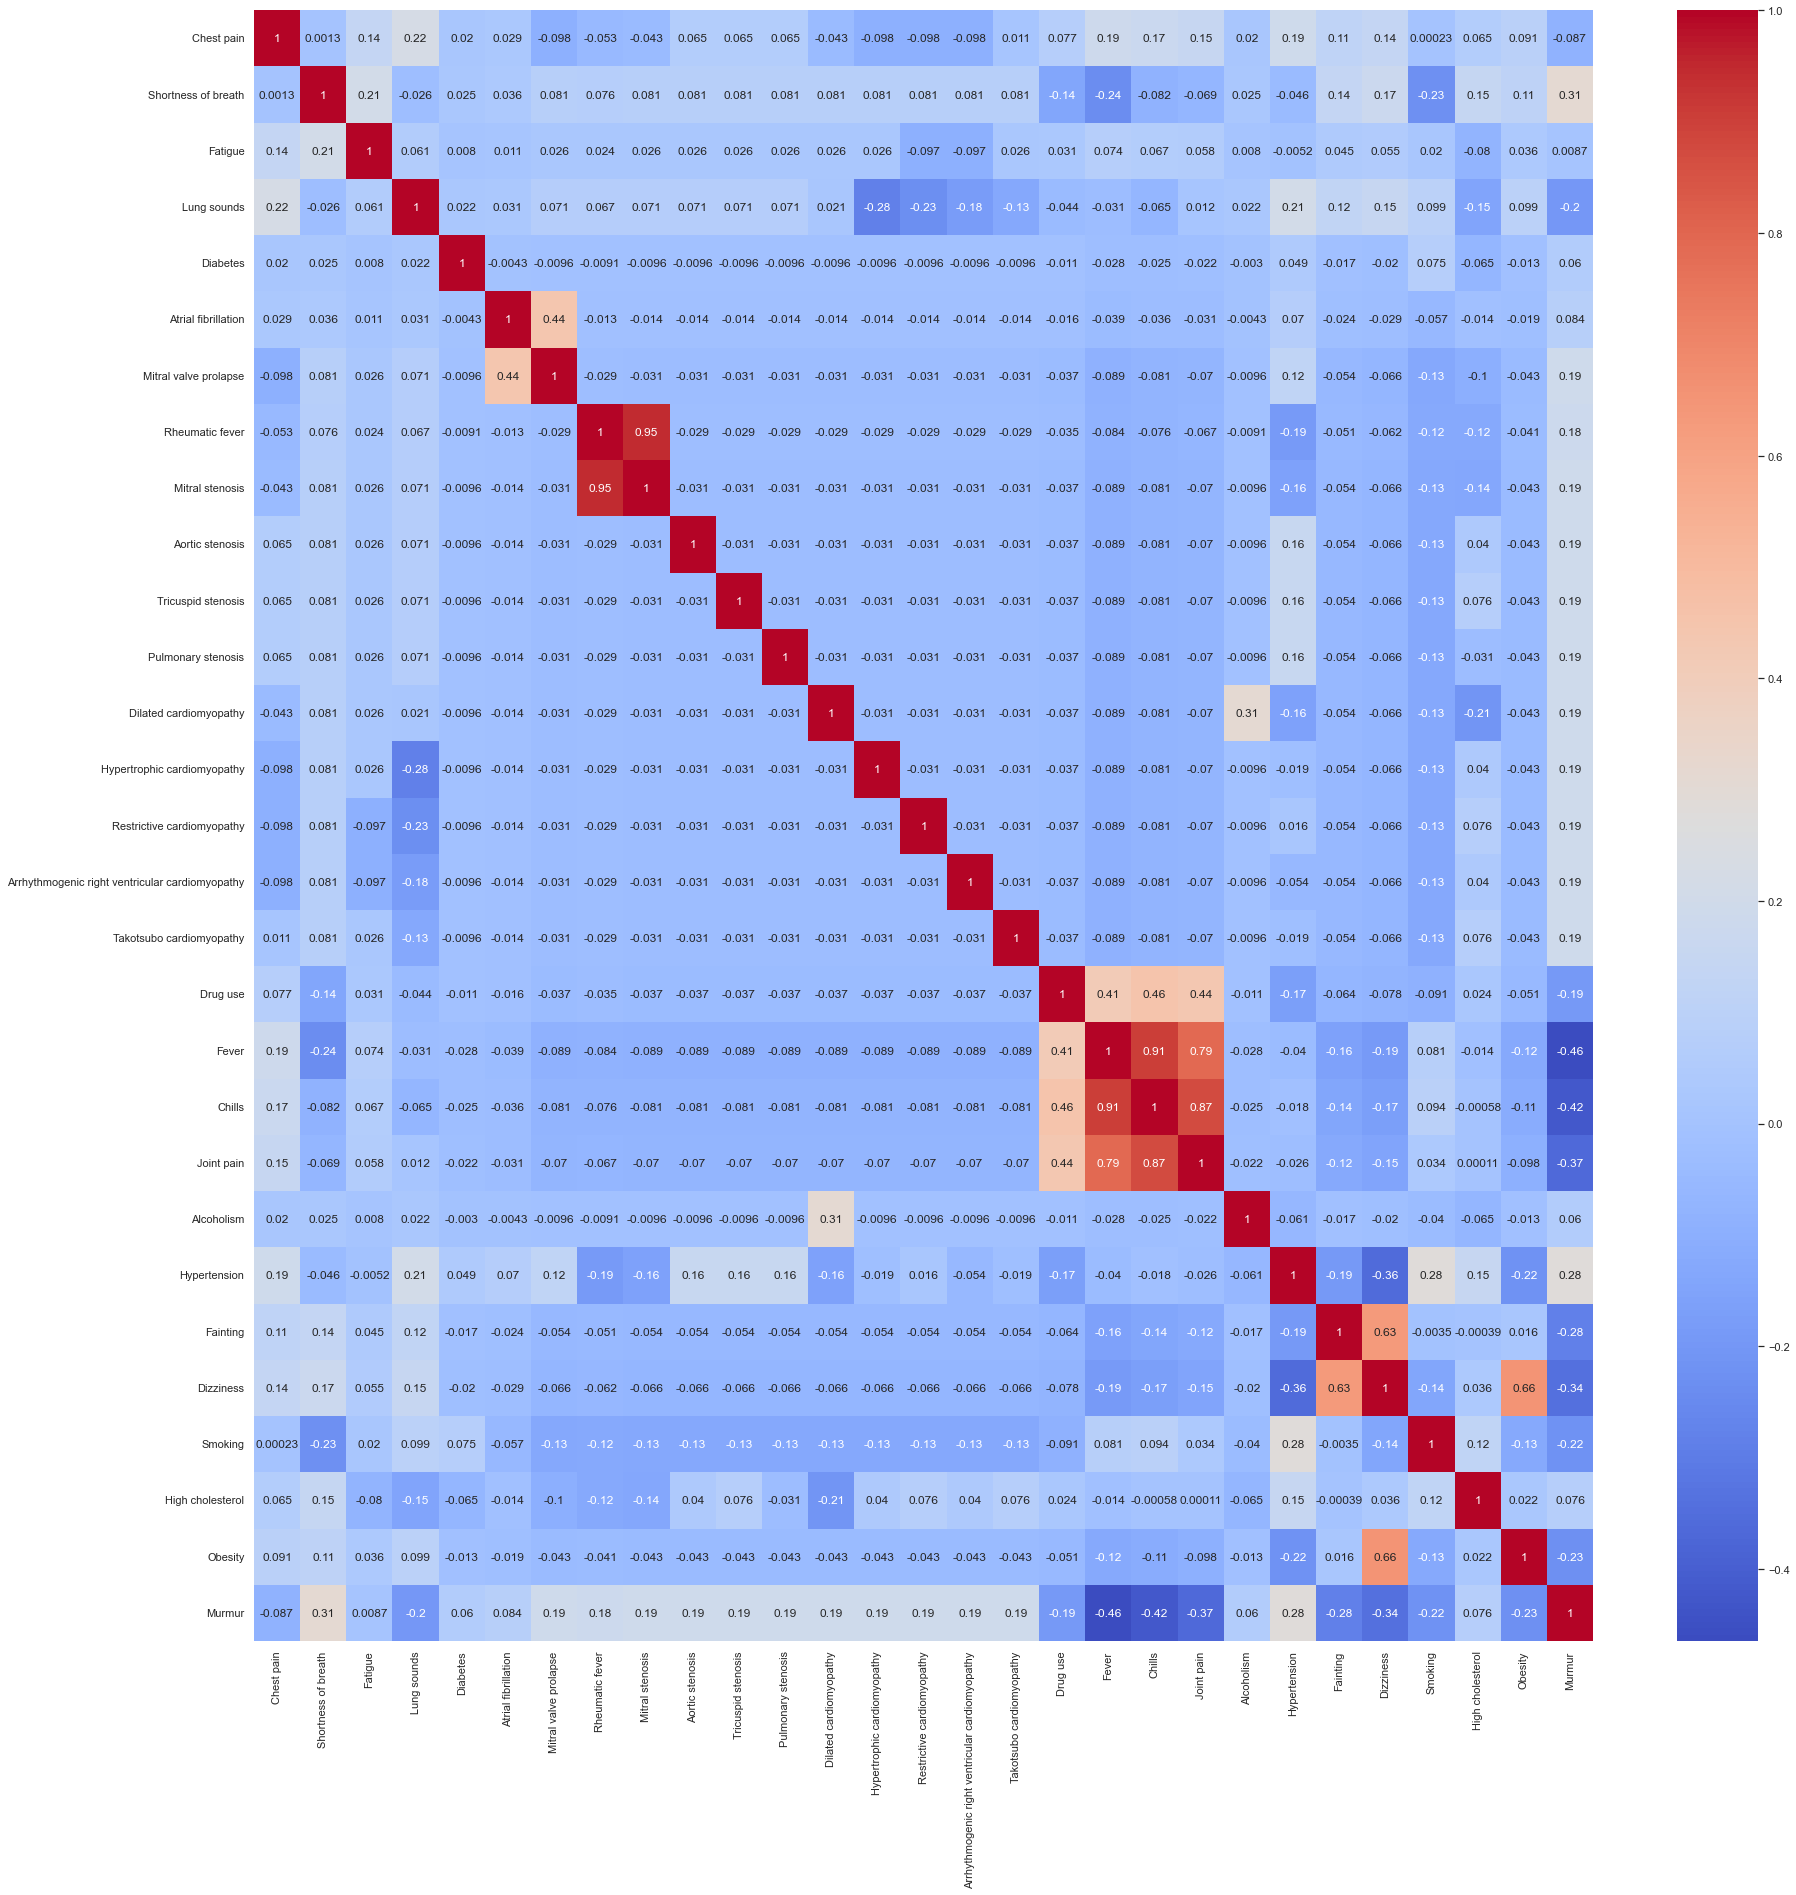

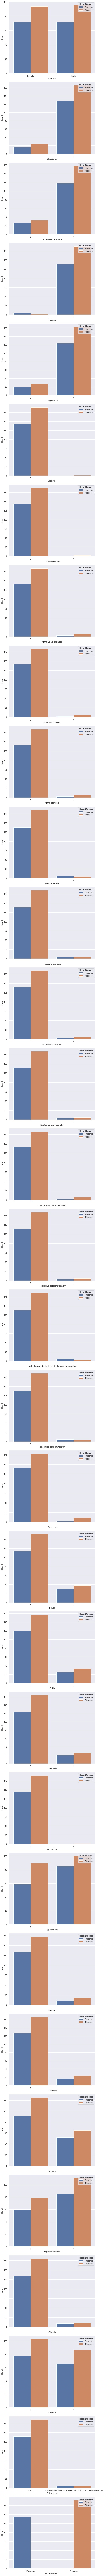

In [26]:
binary_vars = []
for col in data.columns:
    if data[col].nunique() == 2:
        binary_vars.append(col)
corr_matrix = data[binary_vars + ['Heart Disease']].corr()
f, ax = plt.subplots(figsize=(30, 30))
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True,ax=ax)

# Create subplots for each binary variable
fig, axes = plt.subplots(nrows=len(binary_vars), figsize=(8, 6*len(binary_vars)))
for i, var in enumerate(binary_vars):
    sb.countplot(x=var, hue='Heart Disease', data=data, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Heart Disease', loc='upper right')

plt.tight_layout()
plt.show()

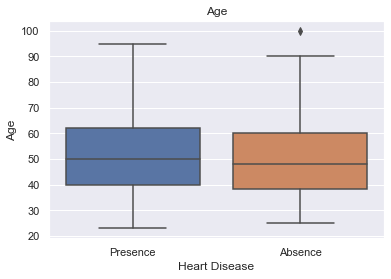

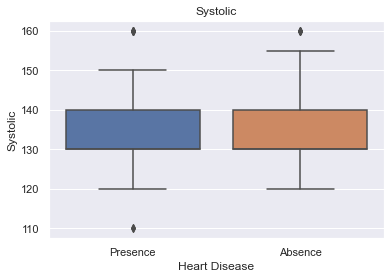

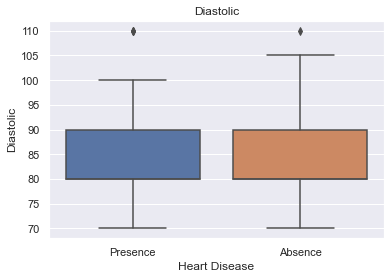

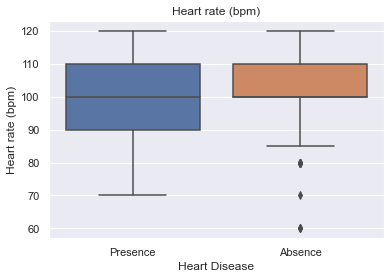

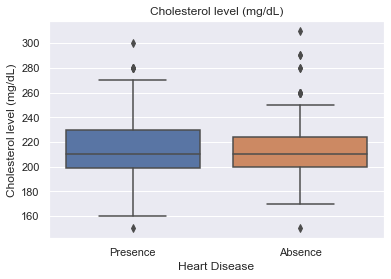

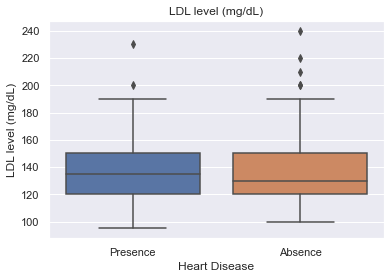

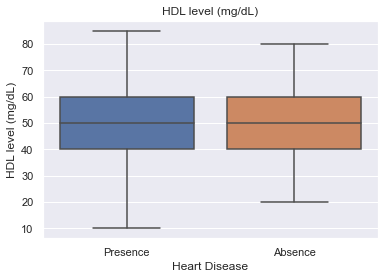

In [30]:
numeric_cols = []
for col in data.columns:
    if data[col].nunique() > 2:
        if data[col].dtype == 'int64':
            numeric_cols.append(col)

# Generate boxplot for each numeric column by presence/absence of heart disease
for col in numeric_cols:
    plt.figure()
    sb.boxplot(x='Heart Disease', y=col, data=data)
    plt.title(col)
    plt.show()

<AxesSubplot:>

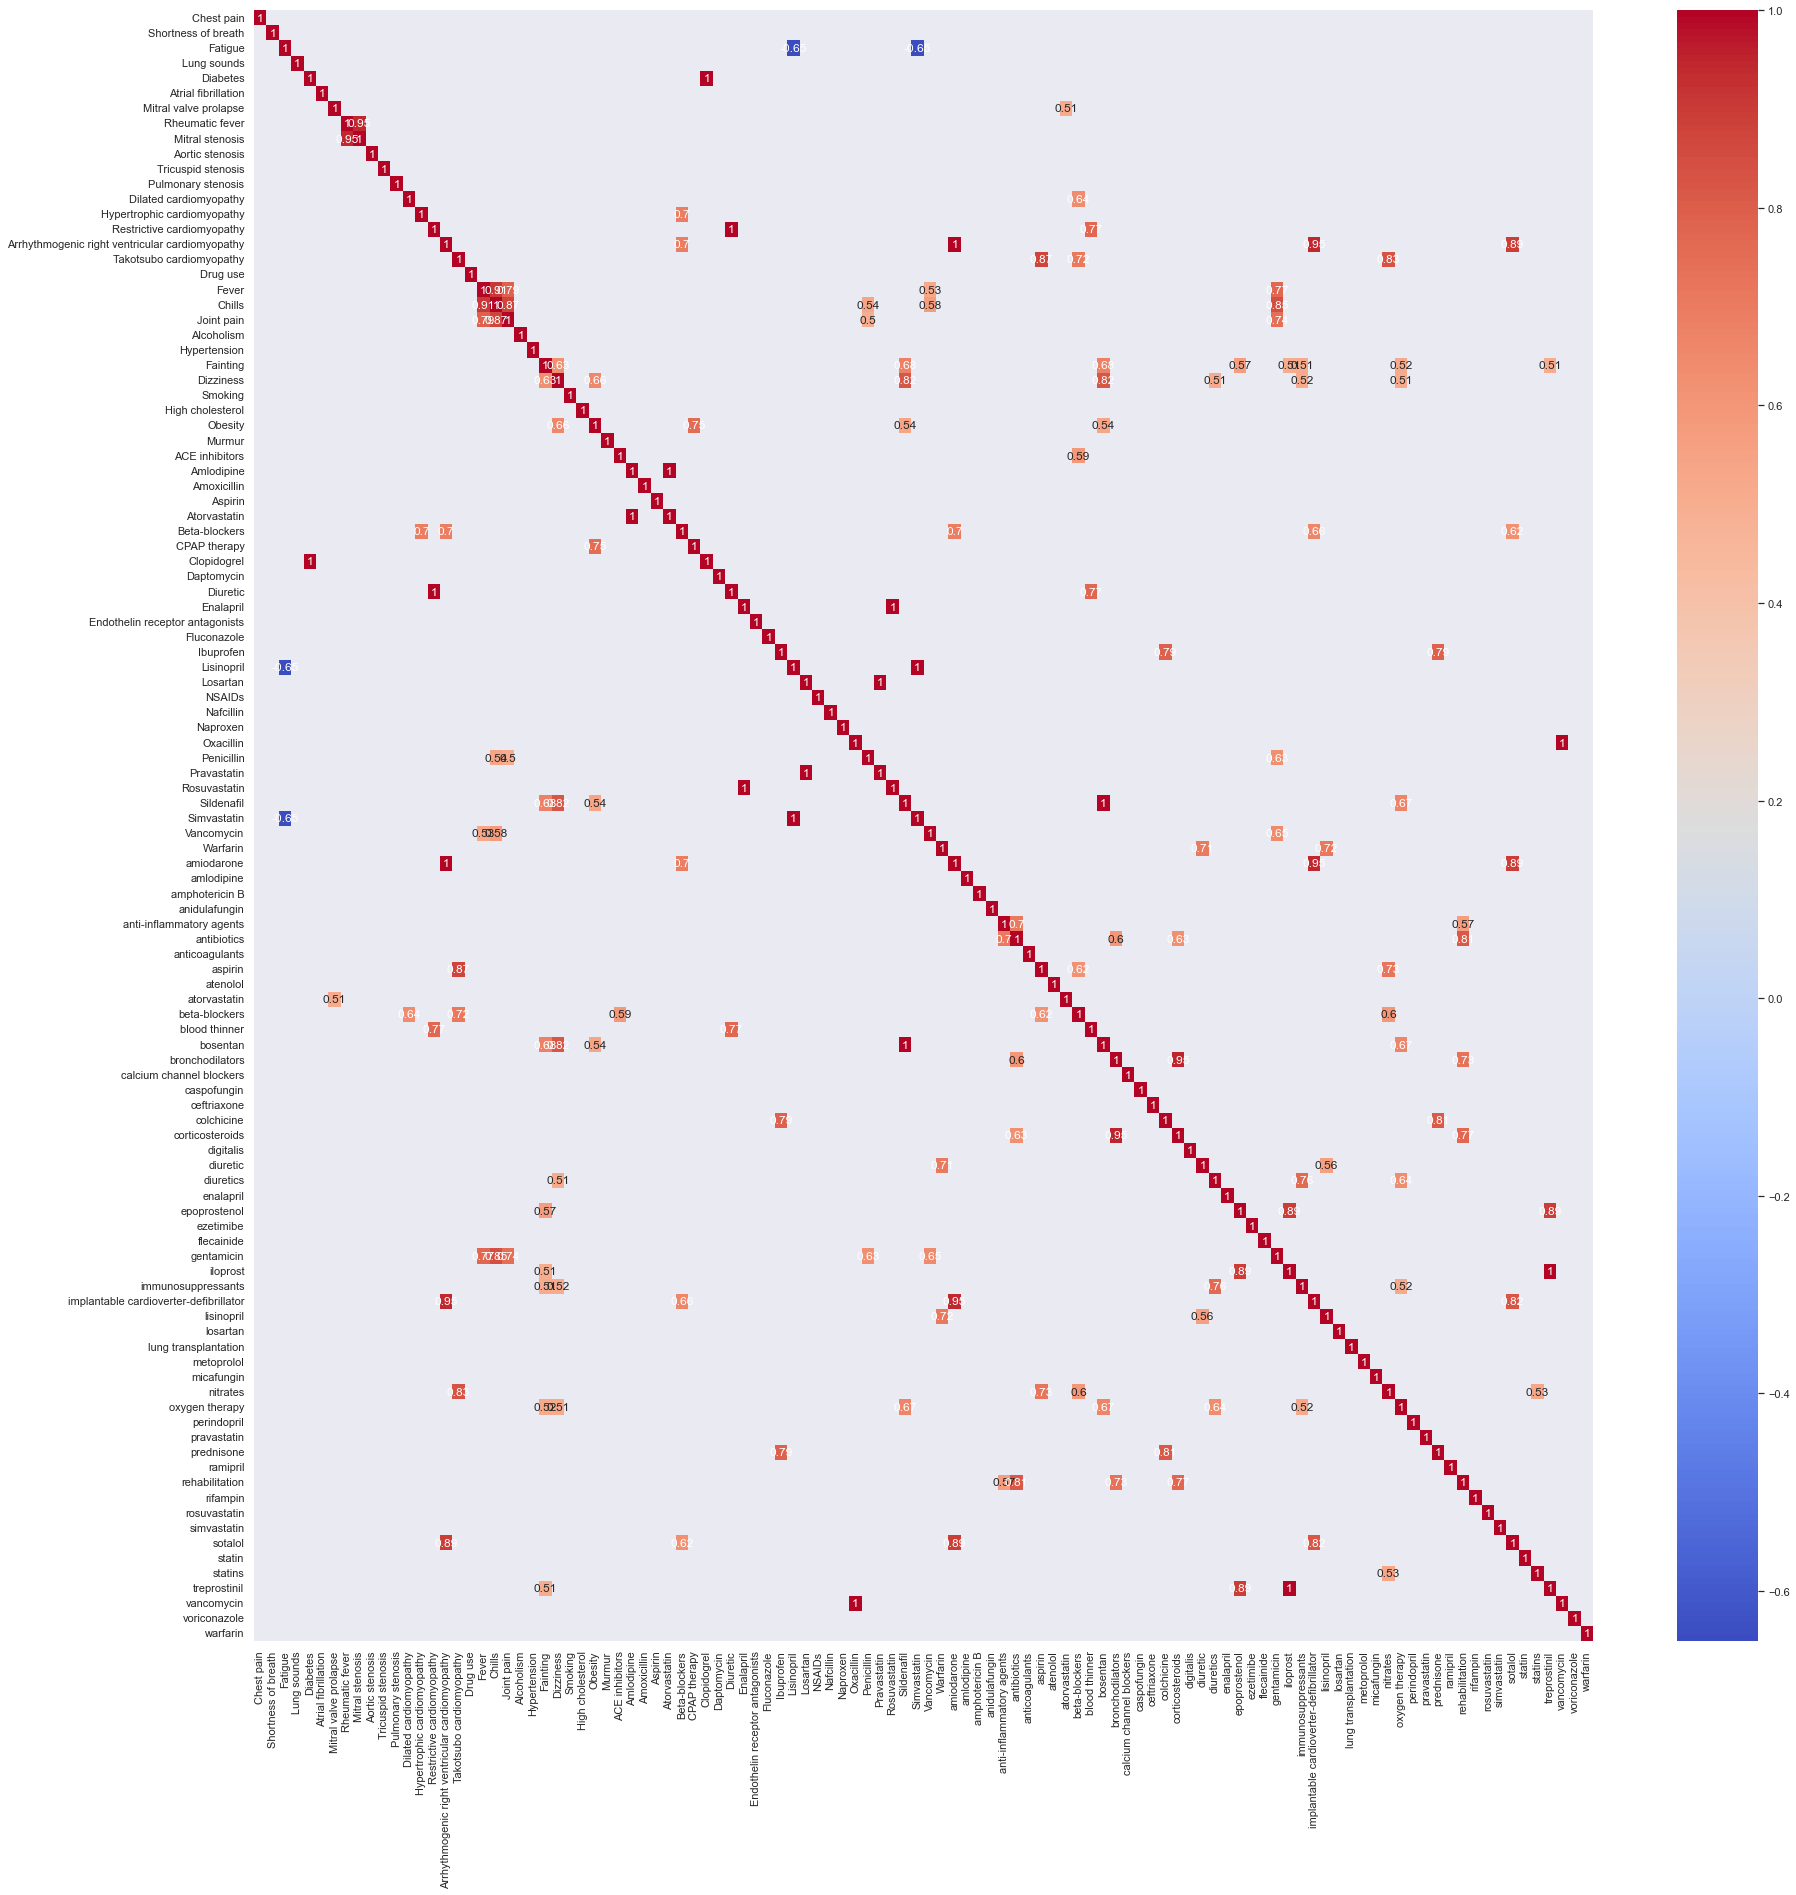

In [41]:

medications = data['Medications'].str.get_dummies(sep=', ')


data2 = pd.concat([data[binary_vars], medications], axis=1)
corr_matrix = data2.corr()
mask = corr_matrix.abs() > 0.5

# Plot heatmap with masked values
f, ax = plt.subplots(figsize=(30, 30))
sb.heatmap(corr_matrix[mask], cmap='coolwarm', annot=True, ax=ax)

In [43]:
corr_indices = np.where(np.abs(corr_matrix) > 0.5)

# Iterate over the indices and print out the correlations and the corresponding variable pairs
for i, j in zip(*corr_indices):
    if i != j and 0.5<corr_matrix.iloc[i, j]<1:
        print(f"Correlation of {corr_matrix.iloc[i, j]:.2f} between {corr_matrix.columns[i]} and {corr_matrix.columns[j]}")

Correlation of 0.51 between Mitral valve prolapse and atorvastatin
Correlation of 0.95 between Rheumatic fever and Mitral stenosis
Correlation of 0.95 between Mitral stenosis and Rheumatic fever
Correlation of 0.64 between Dilated cardiomyopathy and beta-blockers
Correlation of 0.70 between Hypertrophic cardiomyopathy and Beta-blockers
Correlation of 0.77 between Restrictive cardiomyopathy and blood thinner
Correlation of 0.70 between Arrhythmogenic right ventricular cardiomyopathy and Beta-blockers
Correlation of 0.95 between Arrhythmogenic right ventricular cardiomyopathy and implantable cardioverter-defibrillator
Correlation of 0.89 between Arrhythmogenic right ventricular cardiomyopathy and sotalol
Correlation of 0.87 between Takotsubo cardiomyopathy and aspirin
Correlation of 0.72 between Takotsubo cardiomyopathy and beta-blockers
Correlation of 0.83 between Takotsubo cardiomyopathy and nitrates
Correlation of 0.91 between Fever and Chills
Correlation of 0.79 between Fever and Joi